In [8]:
%matplotlib widget
#ipympl

In [1]:
! eups list -s lsst_distrib

   g4213664e8e+b08e1c1b0b 	current w_2024_04 setup


In [2]:
# plotting
import pylab as plt
import numpy as np

# butler
from lsst.daf.butler import Butler

# isr and display
import lsst.afw.display as afwDisplay
from lsst.afw.image import Image

# camera stuff
import lsst.afw.math as afwMath
from lsst.afw.cameraGeom import utils as cgu
from lsst.obs.lsst import LsstCam

from matplotlib.backend_bases import MouseButton

In [14]:
click_buffer = []

def on_click(event):
    if event.button is MouseButton.LEFT:
        print(f'{event.xdata} {event.ydata}')
        click_buffer.append((event.xdata, event.ydata))

def displayImageGhosts(image,title=None, frame_size=16):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(frame_size,frame_size))
    afw_display = afwDisplay.Display(1)
    #afw_display.scale('asinh', 'zscale')
    afw_display.scale('linear', min=0, max=20)
    afw_display.setImageColormap(cmap='plasma')
    afw_display.mtv(image)
    plt.title(title)
    #plt.gca().axis('off')
    return afw_display


In [4]:

import lsst.daf.butler as daf_butler
repo = "/sdf/data/rubin/repo/ir2"
butler = daf_butler.Butler(repo)

collections = butler.registry.queryCollections(f"u/bregeon/eo_focal_plane_mosaic*",
                                               collectionTypes=daf_butler.CollectionType.CHAINED)
for item in collections[:5]:
    print(item)


u/bregeon/eo_focal_plane_mosaic_3023062500401_w_2024_12


In [5]:

myref=list(set(butler.registry.queryDatasets(datasetType='eoFpMosaic',
                                       instrument='LSSTCam',
                                       collections=collections)))

imageF = butler.get(myref[0])


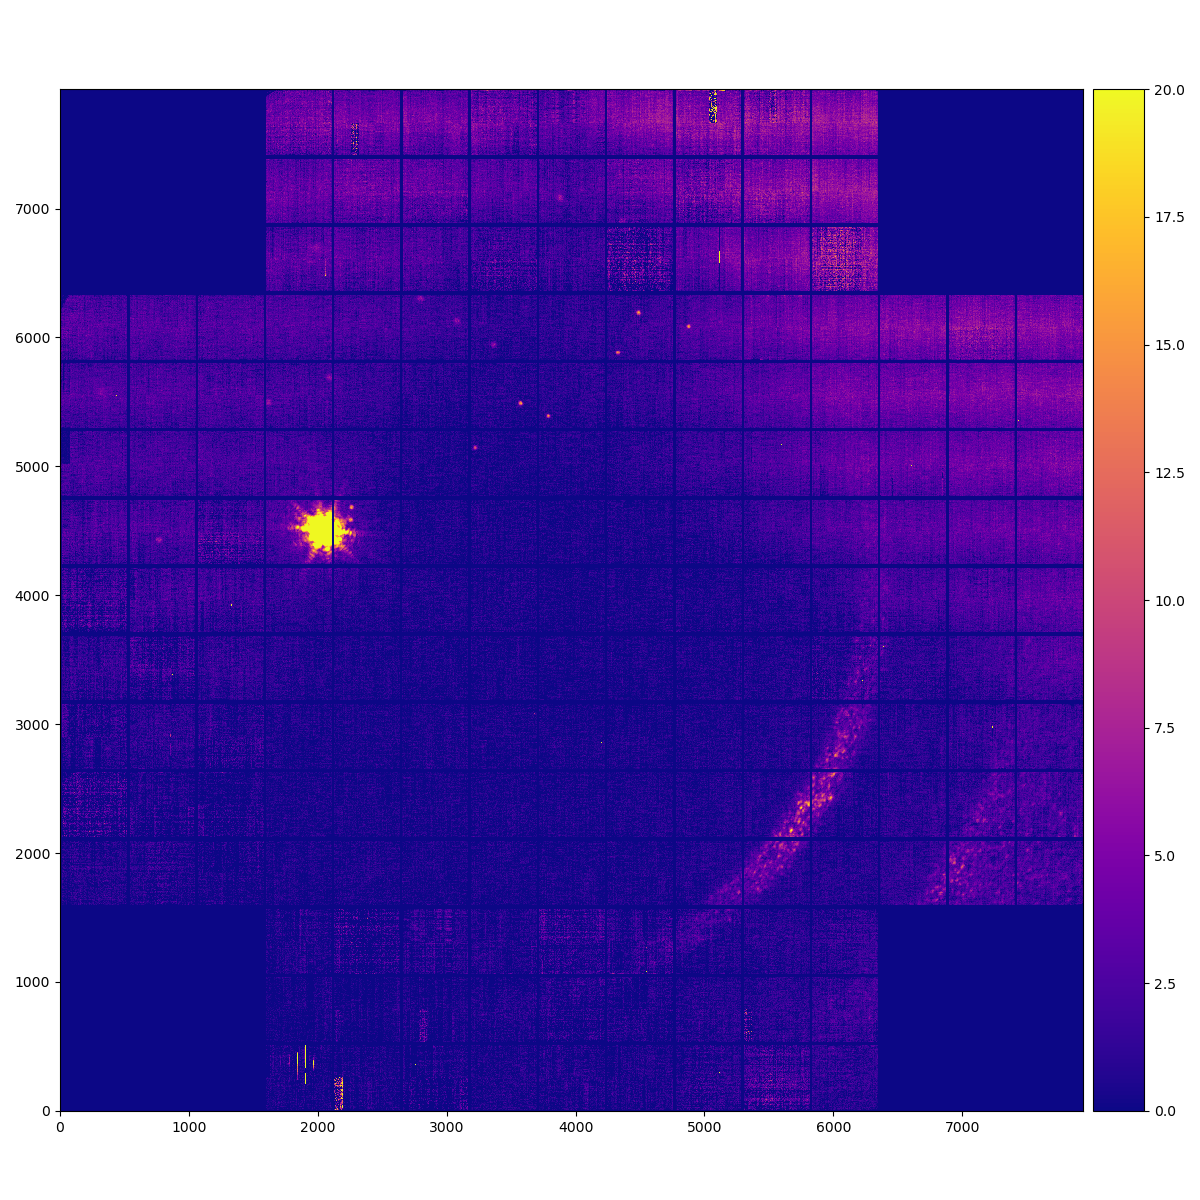

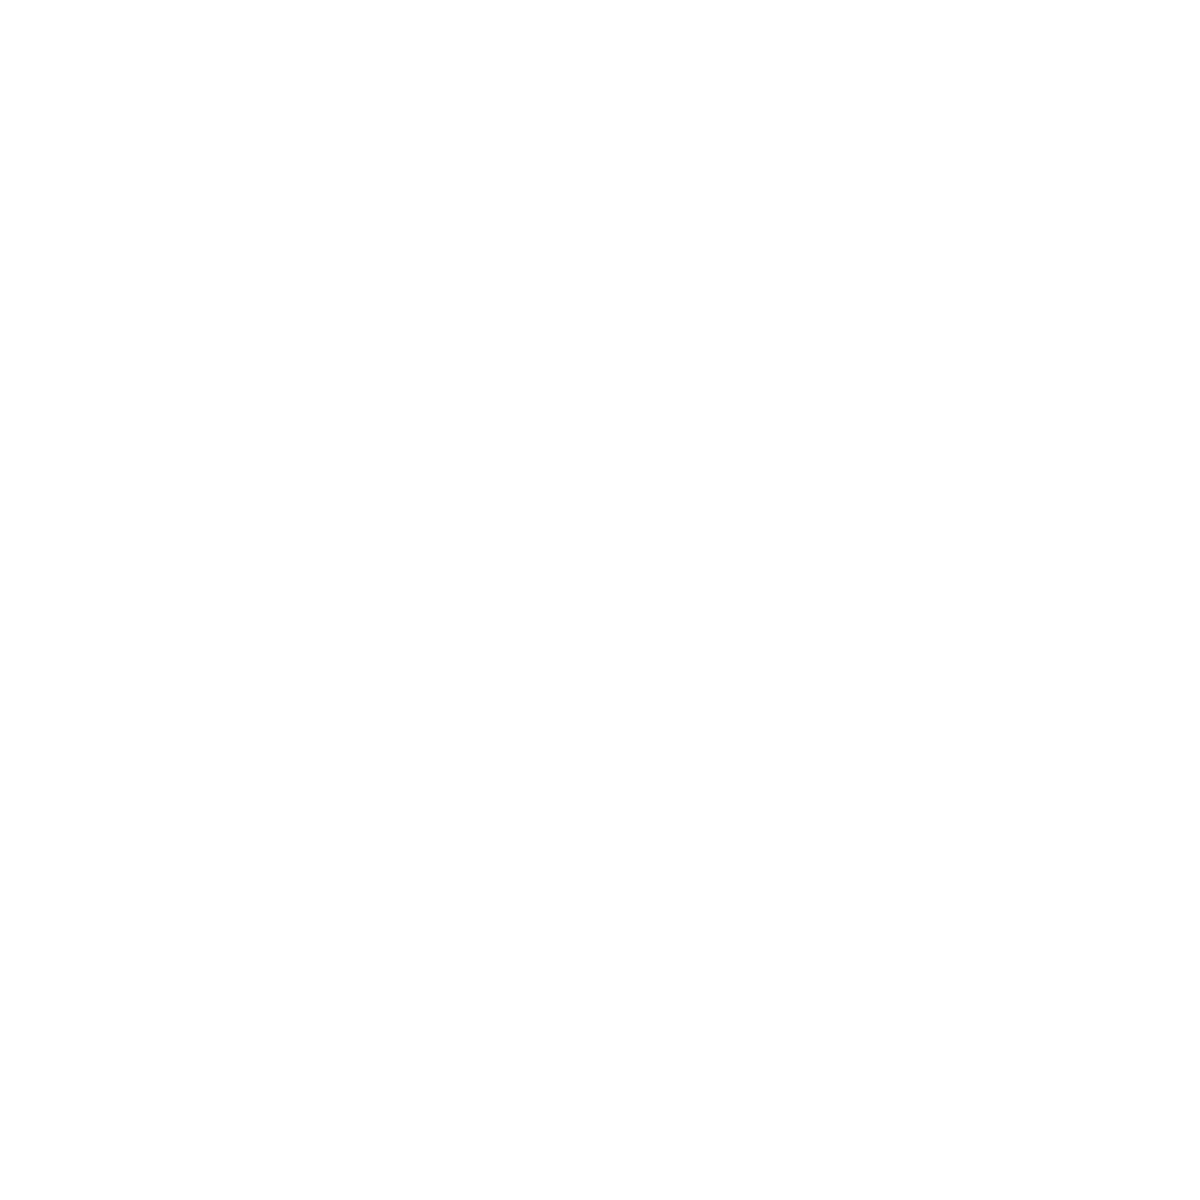

In [16]:
displayImageGhosts(imageF, frame_size=12)
plt.connect('button_press_event', on_click)
plt.tight_layout()
plt.show()



In [17]:
click_buffer

[(332.07017847975396, 5567.560178259461),
 (332.07017847975396, 5567.560178259461),
 (332.07017847975396, 5567.560178259461),
 (332.07017847975396, 5567.560178259461),
 (758.7461429009786, 4442.687181148961),
 (758.7461429009786, 4442.687181148961),
 (1612.0980717434275, 5513.255964605852),
 (1612.0980717434275, 5513.255964605852),
 (2085.3205050106035, 5699.441839989659),
 (2085.3205050106035, 5699.441839989659),
 (2255.990890779093, 4597.8420773021335),
 (2255.990890779093, 4597.8420773021335),
 (2263.7486355867522, 4706.4505046093545),
 (2263.7486355867522, 4706.4505046093545),
 (2007.7430569340174, 6715.706409792939),
 (2007.7430569340174, 6715.706409792939),
 (2806.7907721228557, 6312.30367979469),
 (2806.7907721228557, 6312.30367979469),
 (3086.0695851985665, 6141.6332940262),
 (3086.0695851985665, 6141.6332940262),
 (3225.708991736422, 5164.157448261213),
 (3225.708991736422, 5164.157448261213),
 (3357.5906534666183, 5939.931929027076),
 (3357.5906534666183, 5939.931929027076),


In [21]:
myspots = list(set(click_buffer))
myspots

[(3086.0695851985665, 6141.6332940262),
 (2007.7430569340174, 6715.706409792939),
 (4490.221395384779, 6215.331869698957),
 (758.7461429009786, 4442.687181148961),
 (4366.09747846224, 6936.8021368112095),
 (3784.2666178878435, 5404.647537298631),
 (2263.7486355867522, 4706.4505046093545),
 (2085.3205050106035, 5699.441839989659),
 (3877.3595555797465, 7095.835905368211),
 (4878.1086357677095, 6106.723442391736),
 (4319.551009616289, 5897.264332584953),
 (3225.708991736422, 5164.157448261213),
 (332.07017847975396, 5567.560178259461),
 (3559.2920184657432, 5505.498219798193),
 (1612.0980717434275, 5513.255964605852),
 (2806.7907721228557, 6312.30367979469),
 (3357.5906534666183, 5939.931929027076),
 (2255.990890779093, 4597.8420773021335)]

In [22]:
len(myspots)

18